---
<h1 align='center' style="color:green">[ Wine Quality Prediction ]</h1>

---

### The dataset related to red variants of the Portuguese “Vinho Verde” wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

### We will take into account various input features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. Based on these features we will predict the quality of the wine.

---
## # Import The Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# import the dataset
dataset=pd.read_csv("Data/winequality.csv")

### Apply descriptive statitics

In [57]:
# Check the no of rows n columns
dataset.shape

(1599, 12)

### It will give (1599, 12) as output which means our dataset has 1599 rows and 12 columns.


In [7]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# statistical details of the dataset
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Check null value

In [9]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

### There are a no NULL value in our dataset

### Once the above code is executed, all the columns should give False, In case for any column you find True result, then remove all the null values from that column using "Forward Fill" or  " Backward fill"

In [12]:
dataset=dataset.fillna(method="ffill")

In [13]:
dataset=dataset.fillna(method='bfill')

### Next step is to divide the data into “attributes” and “labels”. X variable contains all the attributes/features and y variable contains labels.

In [49]:
X=dataset[['fixed acidity','volatile acidity',
          'citric acid','residual sugar',
           'chlorides','free sulfur dioxide',
          'total sulfur dioxide','density',
          'pH','sulphates','alcohol']].values
#print(X)

y=dataset['quality'].values
# print(y)

# Data Visualization

### check the average value of the “quality” column.

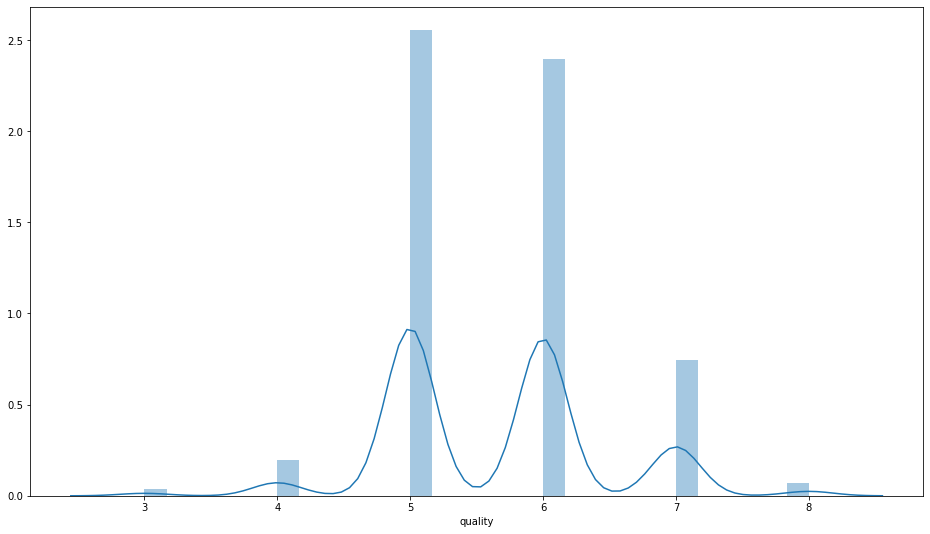

In [20]:
plt.figure(figsize=(16,9))
# plt.tight_layout()
sns.distplot(dataset['quality'])

### As we can observe that most of the time the value is either 5 or 6.

## Split the Data & Train it

###  we split 80% of the data to the training set while 20% of the data to test set

In [21]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test  : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (1279, 11)
Shape of X_test  :  (320, 11)
Shape of y_train :  (1279,)
Shape of y_test  :  (320,)


## Train the model

In [27]:
from sklearn.linear_model import LinearRegression

In [29]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### in the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen

In [60]:
coeff_df=pd.DataFrame(linreg.coef_,dataset.columns.drop('quality'),
                      columns=['Cofficient'])
coeff_df

,Cofficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


### This means that for a unit increase in “density”, there is a decrease of 31.51 units in the quality of the wine. Similarly, a unit decrease in “Chlorides“ results in an increase of 1.87 units in the quality of the wine. We can see that the rest of the features have very little effect on the quality of the wine.

## Now we do prediction on test data.

In [63]:
y_pred=linreg.predict(X_test)
# y_pred

### the difference between the actual value and predicted value.

In [67]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1=df.head(25)
df1

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


## Plot

### plot the comparison of Actual and Predicted values

<Figure size 1152x648 with 0 Axes>

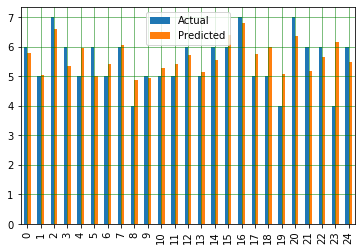

In [79]:
plt.figure(figsize=(16,9))
df1.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color="green")
plt.grid(which='minor',linestyle=":",linewidth='0.5',color='black')
plt.show()

### plot the comparison of Actual and Predicted values

## Final step

### The final step is to evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE. 

In [81]:
print('Mean Absolute Error     : ', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error      : ', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error     :  0.46963309286611066
Mean Squared Error      :  0.3844711978201241
Root Mean Squared Error :  0.6200574149384266


### You can see that the value of root mean squared error is 0.62, which is slightly greater than 10% of the mean value which is 5.63. This means that our algorithm was not very accurate but can still make reasonably good predictions.

## There are many factors that may have contributed to this inaccuracy, for example :

### 1. Need more data: We need to have a huge amount of data to get the best possible prediction.

### 2. Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.

### 3. Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

# Conclusion

### we studied the most fundamental machine learning algorithms i.e. linear regression. We implemented both simple linear regression and multiple linear regression with the help of the Scikit-Learn machine learning library.